# Heart Disease


##  Variable Information
Only 14 attributes used:

    1. Age (age): Patient's age in years.

    2. Sex (sex): Gender of the patient.
        Values: 1 = Male, 0 = Female

    3. Chest Pain Type (cp): Type of chest pain experienced.
        Values: 1 = Typical angina, 2 = Atypical angina, 3 = Non-anginal pain, 4 = Asymptomatic

    4. Resting Blood Pressure (trestbps): Blood pressure on admission in mm Hg.

    5. Serum Cholesterol (chol): Serum cholesterol level in mg/dl.

    6. Fasting Blood Sugar (fbs): Fasting blood sugar level.
        Values: 1 = >120 mg/dl, 0 = <=120 mg/dl

    7. Resting Electrocardiographic Results (restecg): Results of resting electrocardiogram.
        Values: 0 = Normal, 1 = ST-T wave abnormality, 2 = Probable or definite left ventricular hypertrophy

    8. Maximum Heart Rate Achieved (thalach): Maximum heart rate during examination.

    9. Exercise-Induced Angina (exang): Presence of exercise-induced angina.
        Values: 1 = Yes, 0 = No

    10. ST Depression Induced by Exercise Relative to Rest (oldpeak): ST depression induced by exercise relative to rest.

    11. Slope of the Peak Exercise ST Segment (slope): Slope of the peak exercise ST segment.
        Values: 1 = Upsloping, 2 = Flat, 3 = Downsloping

    12. Number of Major Vessels Colored by Fluoroscopy (ca): Number of major vessels colored by fluoroscopy.

    13. Thalassemia (thal): Type of thalassemia.
        Values: 3 = Normal, 6 = Fixed defect, 7 = Reversible defect

    14. Diagnosis of Heart Disease (num): Diagnosis based on angiographic disease status.
        Values: 0 = < 50% diameter narrowing, 1 = > 50% diameter narrowing (in any major vessel)

## Dataset info: 
https://archive.ics.uci.edu/dataset/45/heart+disease


## Introductory Paper

International application of a new probability algorithm for the diagnosis of coronary artery disease.
By R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K. Guppy, S. Lee, V. Froelicher. 1989

Published in American Journal of Cardiology

In [1]:
! pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3e/4a/ecc3456479d687202b34ee42317c3a63e09793c9409a720052d38356431a/ucimlrepo-0.0.3-py3-none-any.whl.metadata


In [142]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# import dataset
#heart_disease = fetch_ucirepo(name='Heart Disease')
heart_disease = fetch_ucirepo(id=45) 


# access data
df = heart_disease['data']['original']

In [64]:
# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [68]:
# First 5 rows of our target
df['num'].value_counts()

num
1    164
0    139
Name: count, dtype: int64

In [143]:
df['num'] = np.int64(df['num'] < 1) # binarize the target

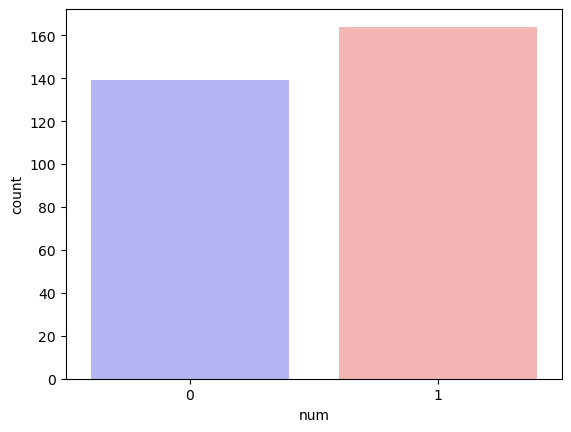

In [72]:
sns.countplot(x="num", data=df, palette="bwr")
plt.show()

In [78]:
countNoDisease = len(df[df.num == 0])
countHaveDisease = len(df[df.num == 1])
print("Percentage of Patients WITHOUT Heart Disease: {:.2f}%".format((countNoDisease / (len(df.num))*100)))
print("Percentage of Patients WITH Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.num))*100)))

Percentage of Patients WITHOUT Heart Disease: 45.87%
Percentage of Patients WITH Heart Disease: 54.13%


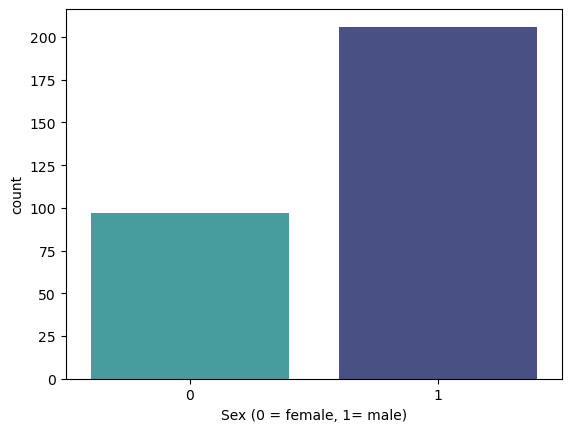

In [79]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [85]:
df.groupby('num').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
num,,,,,,,,,,,,,
0,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.137681,5.840580
1,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.273292,3.797546


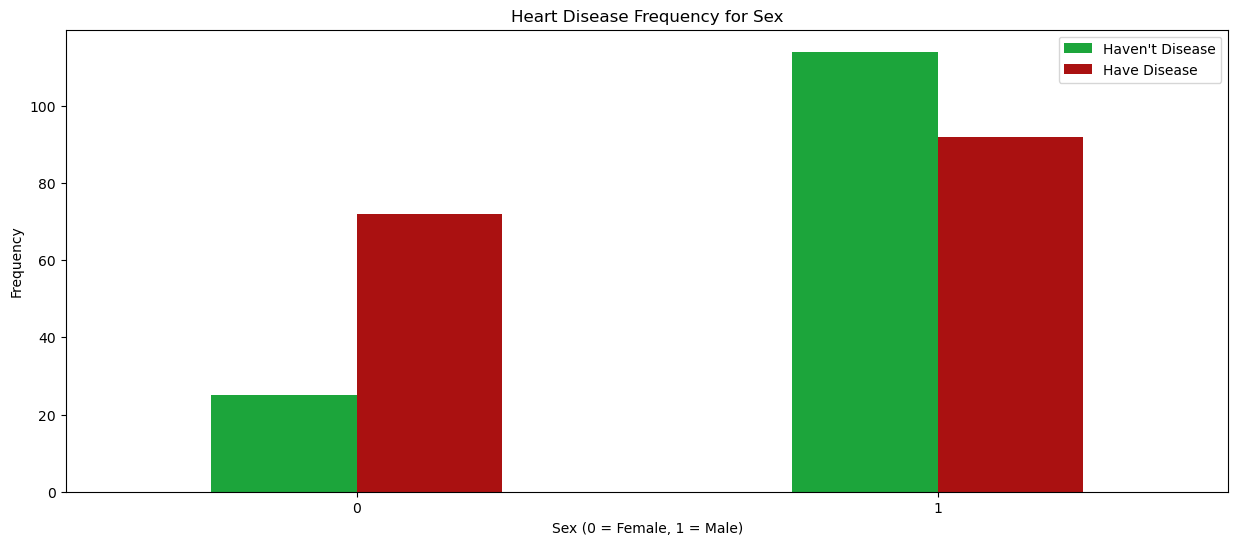

In [87]:
pd.crosstab(df.sex,df.num).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

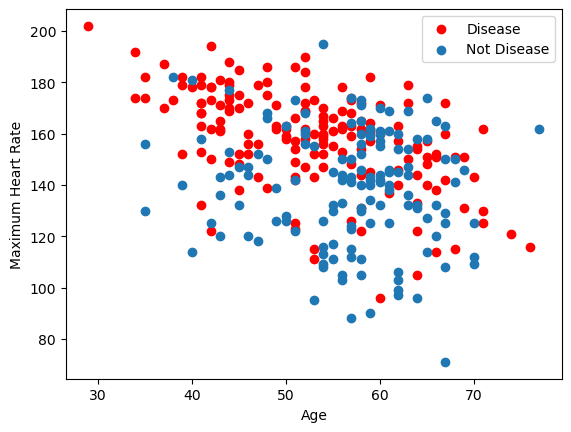

In [90]:
plt.scatter(x=df.age[df.num==1], y=df.thalach[(df.num==1)], c="red")
plt.scatter(x=df.age[df.num==0], y=df.thalach[(df.num==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

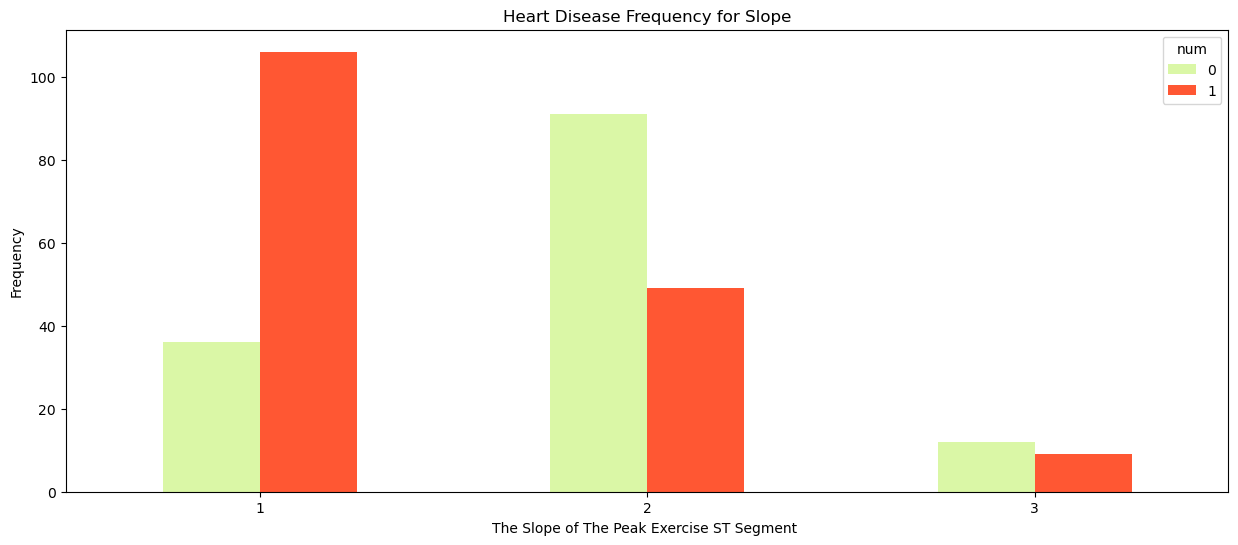

In [92]:
pd.crosstab(df.slope,df.num).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

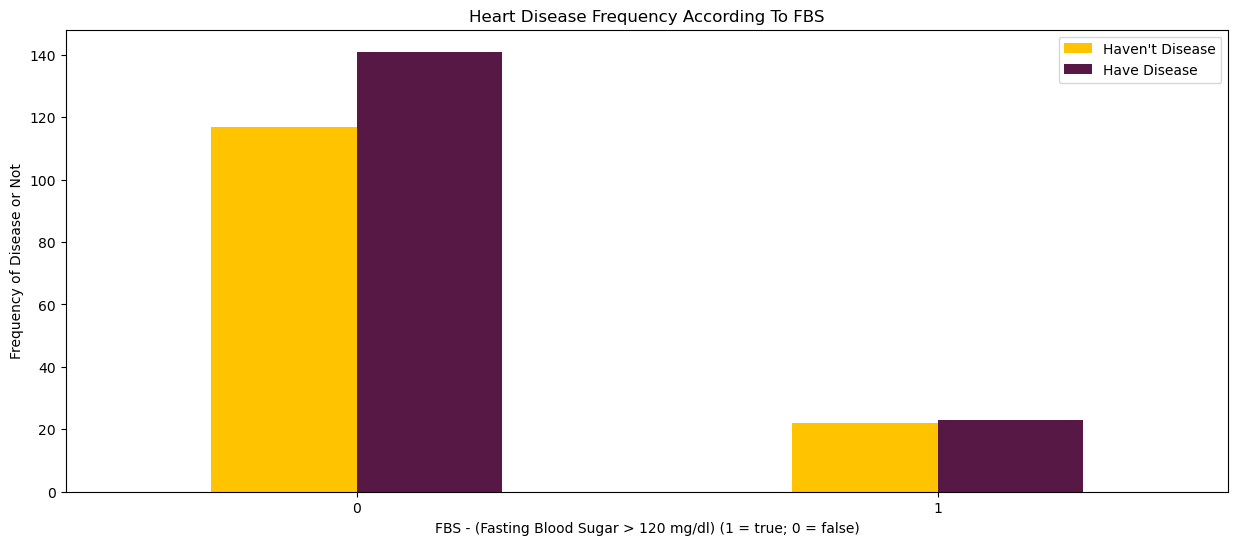

In [94]:
pd.crosstab(df.fbs,df.num).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

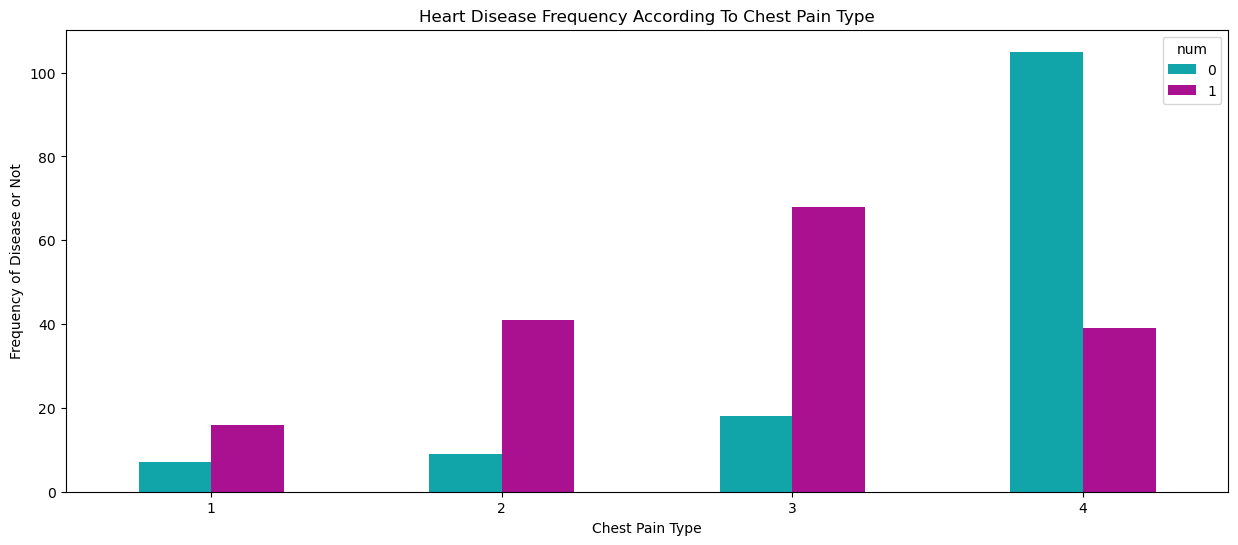

In [96]:
pd.crosstab(df.cp,df.num).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

Creating Dummy Variables
Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

**Chest Pain Type (cp)**: Type of chest pain experienced.
        Values: 1 = Typical angina, 2 = Atypical angina, 3 = Non-anginal pain, 4 = Asymptomatic

**Thalassemia (thal)**: Type of thalassemia.
        Values: 3 = Normal, 6 = Fixed defect, 7 = Reversible defect

**Slope of the Peak Exercise ST Segment (slope)**: Slope of the peak exercise ST segment.
        Values: 1 = Upsloping, 2 = Flat, 3 = Downsloping


In [144]:
# Define the mapping for each categorical variable
cp_mapping = {1: 'Typical angina', 2: 'Atypical angina', 3: 'Non-anginal pain', 4: 'Asymptomatic'}
thal_mapping = {3.0: 'Normal', 6.0: 'Fixed defect', 7.0: 'Reversible defect'}
slope_mapping = {1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'}

# Replace the values in the original DataFrame
df['cp'] = df['cp'].map(cp_mapping)
df['thal'] = df['thal'].map(thal_mapping)
df['slope'] = df['slope'].map(slope_mapping)


In [145]:
# Convert variables to appropriate data types
categorical_vars = ['cp', 'thal', 'slope']
df[categorical_vars] = df[categorical_vars].astype(str)

In [146]:
# Use get_dummies and assign column names
dummies = pd.get_dummies(df[categorical_vars], prefix=categorical_vars,dummy_na = False, drop_first=True)
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=categorical_vars)

In [147]:
df 

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,num,cp_Atypical angina,cp_Non-anginal pain,cp_Typical angina,thal_Normal,thal_Reversible defect,thal_nan,slope_Flat,slope_Upsloping
0,63,1,145,233,1,2,150,0,2.3,0.0,1,False,False,True,False,False,False,False,False
1,67,1,160,286,0,2,108,1,1.5,3.0,0,False,False,False,True,False,False,True,False
2,67,1,120,229,0,2,129,1,2.6,2.0,0,False,False,False,False,True,False,True,False
3,37,1,130,250,0,0,187,0,3.5,0.0,1,False,True,False,True,False,False,False,False
4,41,0,130,204,0,2,172,0,1.4,0.0,1,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,0,132,0,1.2,0.0,0,False,False,True,False,True,False,True,False
299,68,1,144,193,1,0,141,0,3.4,2.0,0,False,False,False,False,True,False,True,False
300,57,1,130,131,0,0,115,1,1.2,1.0,0,False,False,False,False,True,False,True,False
301,57,0,130,236,0,2,174,0,0.0,1.0,0,True,False,False,True,False,False,True,False
